In [1]:
import acquire, wrangle_zillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



df = wrangle_zillow.zillow_datac()
df.shape

(77414, 63)

In [2]:
#df.info()

In [3]:
df = wrangle_zillow.get_counties(df)

# Lets get rid of a few columns

In [4]:
df = df.drop(columns=['parcelid','typeconstructiontypeid','storytypeid','propertylandusetypeid',
                      'heatingorsystemtypeid','buildingclasstypeid','architecturalstyletypeid',
                      'airconditioningtypeid','id','basementsqft','buildingqualitytypeid','decktypeid',
                      'finishedfloor1squarefeet','finishedsquarefeet12','finishedsquarefeet13',
                      'finishedsquarefeet50','finishedsquarefeet15','finishedsquarefeet6','fireplacecnt',
                      'garagetotalsqft','poolsizesum','pooltypeid10','pooltypeid2','pooltypeid7',
                      'propertycountylandusecode','propertyzoningdesc','rawcensustractandblock',
                      'regionidcounty','regionidneighborhood','threequarterbathnbr','unitcnt',
                      'yardbuildingsqft17','yardbuildingsqft26','fireplaceflag',
                      'assessmentyear','taxdelinquencyflag','taxdelinquencyyear','id',])
df
df.shape

(77414, 26)

In [5]:
#gets the fips info and returns the county names with new columns into the dataframe
df.isnull().sum()
df.shape

(77414, 26)

In [6]:
wrangle_zillow.nulls_by_col(df)
df.shape

(77414, 26)

In [7]:
# creating new features

df = wrangle_zillow.create_features(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   77414 non-null  float64
 1   bedroomcnt                    77414 non-null  float64
 2   calculatedbathnbr             74202 non-null  float64
 3   calculatedfinishedsquarefeet  76306 non-null  float64
 4   fullbathcnt                   74202 non-null  float64
 5   garagecarcnt                  23253 non-null  float64
 6   hashottuborspa                1257 non-null   float64
 7   latitude                      77414 non-null  float64
 8   longitude                     77414 non-null  float64
 9   lotsizesquarefeet             70354 non-null  float64
 10  poolcnt                       14218 non-null  float64
 11  regionidcity                  75895 non-null  float64
 12  regionidzip                   77141 non-null  float64
 13  r

In [8]:
# dropping more columns
df = df.drop(columns=['calculatedbathnbr','fullbathcnt','garagecarcnt','hashottuborspa','regionidcity',
                 'regionidzip','numberofstories','censustractandblock','cola','transactiondate'])


In [9]:
df.isnull().sum()
df.shape

(77414, 23)

In [10]:
df = wrangle_zillow.remove_outliers(df)
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,yearbuilt,structuretaxvaluedollarcnt,...,logerror,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
20,2.0,4.0,3633.0,34560018.0,-118169806.0,9826.0,NaN,0.0,2005.0,222321.0,...,0.042463,1,0,0,12.0,0.023417,0.225574,61.194880,7.541624,2.000000
28,4.0,5.0,2865.0,33879216.0,-118361434.0,4990.0,NaN,0.0,1972.0,271704.0,...,0.206470,1,0,0,45.0,0.012578,0.114555,94.835602,112.128257,1.250000
30,2.0,2.0,1090.0,33974100.0,-118423000.0,40247.0,NaN,0.0,2004.0,232897.0,...,0.021853,1,0,0,13.0,0.017242,0.923944,213.666972,3.097647,1.000000
33,2.0,3.0,2077.0,34012977.0,-118479243.0,6490.0,NaN,0.0,1926.0,210192.0,...,-0.040807,1,0,0,91.0,0.012253,0.148990,101.199807,67.267797,1.500000
34,3.0,3.0,2019.0,34003621.0,-118477513.0,6763.0,NaN,0.0,NaN,451786.0,...,-0.018862,1,0,0,NaN,0.011900,0.155257,223.767211,144.864114,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,3.0,4.0,1921.0,34572256.0,-118024872.0,6763.0,NaN,0.0,1990.0,129566.0,...,0.020615,1,0,0,27.0,0.017654,0.155257,67.447163,4.798610,1.333333
77410,3.0,4.0,1780.0,34571498.0,-118039412.0,6822.0,NaN,0.0,1989.0,100744.0,...,0.013209,1,0,0,28.0,0.019014,0.156612,56.597753,3.690853,1.333333
77411,2.0,3.0,1549.0,34575327.0,-118054267.0,6987.0,NaN,0.0,1990.0,149241.0,...,0.037129,1,0,0,27.0,0.016744,0.160399,96.346675,7.119937,1.500000
77412,3.0,3.0,1339.0,34572200.0,-118053000.0,271458.0,NaN,0.0,1990.0,118900.0,...,0.007204,1,0,0,27.0,0.016895,6.231818,88.797610,0.109409,1.000000


In [11]:
# checking if outliers function got rid of most of the nulls
df.isnull().sum()
df.shape

(67481, 23)

In [12]:
#going to drop the rest of the nulls
df = df.drop(columns=['poolcnt'])
df.shape

(67481, 22)

In [13]:
df.isnull().sum()
#df.shape

bathroomcnt                      0
bedroomcnt                       0
calculatedfinishedsquarefeet     0
latitude                         0
longitude                        0
lotsizesquarefeet                0
roomcnt                          0
yearbuilt                       62
structuretaxvaluedollarcnt      24
taxvaluedollarcnt                0
landtaxvaluedollarcnt            0
taxamount                        0
logerror                         0
LA                               0
Orange                           0
Ventura                          0
age                             62
taxrate                          0
acres                            0
structure_dollar_per_sqft       24
land_dollar_per_sqft             0
bed_bath_ratio                   0
dtype: int64

In [14]:
df.dropna(inplace=True)
df.shape

(67395, 22)

In [15]:
#making sure we dont have any nulls
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
latitude                        0
longitude                       0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
LA                              0
Orange                          0
Ventura                         0
age                             0
taxrate                         0
acres                           0
structure_dollar_per_sqft       0
land_dollar_per_sqft            0
bed_bath_ratio                  0
dtype: int64

In [16]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_zillow.split(df, 'logerror')

In [17]:
# Time to EXPLORE
X_train.shape, X_validate.shape,X_test.shape
X_train.describe()


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,taxamount,LA,Orange,Ventura,age,taxrate,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio
count,37741.000000,37741.000000,37741.00000,3.774100e+04,3.774100e+04,37741.000000,37741.000000,37741.000000,3.774100e+04,3.774100e+04,...,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000,37741.000000
mean,2.283617,3.243184,1805.73970,3.402324e+07,-1.182273e+08,16966.160833,1.609152,1962.577277,1.693683e+05,4.278609e+05,...,5243.142018,0.713760,0.208209,0.078032,54.422723,0.013118,0.389489,88.566119,37.225998,1.560720
std,0.927166,0.997294,826.39359,2.378054e+05,3.412033e+05,40108.366566,2.985957,22.611698,1.638743e+05,4.658047e+05,...,5365.095838,0.452009,0.406032,0.268225,22.611698,0.002838,0.920761,51.360644,57.468022,0.570448
min,1.000000,1.000000,320.00000,3.333938e+07,-1.194484e+08,435.000000,0.000000,1808.000000,1.000000e+01,1.030100e+04,...,50.720000,0.000000,0.000000,0.000000,1.000000,0.000282,0.009986,0.010823,0.004356,0.250000
25%,2.000000,3.000000,1242.00000,3.385198e+07,-1.184161e+08,5700.000000,0.000000,1950.000000,7.919500e+04,1.902000e+05,...,2543.560000,0.000000,0.000000,0.000000,38.000000,0.011820,0.130854,55.683557,7.352953,1.000000
50%,2.000000,3.000000,1600.00000,3.403373e+07,-1.181978e+08,7003.000000,0.000000,1961.000000,1.280000e+05,3.235820e+05,...,4058.490000,1.000000,0.000000,0.000000,56.000000,0.012394,0.160767,82.039334,23.281329,1.500000
75%,3.000000,4.000000,2164.00000,3.417652e+07,-1.179781e+08,9750.000000,0.000000,1979.000000,2.030000e+05,5.143950e+05,...,6204.880000,1.000000,0.000000,0.000000,67.000000,0.013509,0.223829,111.727967,46.525815,2.000000
max,7.000000,7.000000,6997.00000,3.480695e+07,-1.175559e+08,435559.000000,86.000000,2016.000000,4.568625e+06,1.878212e+07,...,224696.170000,1.000000,1.000000,1.000000,209.000000,0.049959,9.999059,991.246461,2238.451004,7.000000


In [18]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_zillow.scale_min_max(X_train,X_validate,X_test)

In [19]:
X_train_scaled,X_validate_scaled,X_test_scaled

(       bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  latitude  \
 34411     0.166667    0.166667                      0.222405  0.455669   
 28489     0.333333    0.333333                      0.204283  0.721281   
 75203     0.166667    0.500000                      0.294593  0.620845   
 76643     0.166667    0.333333                      0.247716  0.623014   
 66301     0.000000    0.333333                      0.135091  0.401462   
 ...            ...         ...                           ...       ...   
 10125     0.166667    0.333333                      0.142429  0.482667   
 6406      0.500000    0.500000                      0.419050  0.565404   
 41726     0.166667    0.333333                      0.209825  0.236288   
 16014     0.333333    0.500000                      0.348660  0.546236   
 20069     0.166667    0.333333                      0.168938  0.476757   
 
        longitude  lotsizesquarefeet   roomcnt  yearbuilt  \
 34411   0.584036           0.018204 

     k         sse
0    2  313.029004
1    3  249.078159
2    4  193.525587
3    5  162.535982
4    6  140.763977
5    7  122.301415
6    8  111.694381
7    9  102.566665
8   10   95.129336
9   11   89.373106
10  12   83.197096
11  13   77.960866
12  14   73.038692
13  15   69.749470
14  16   66.638147
15  17   62.854848
16  18   60.786994
17  19   58.418360


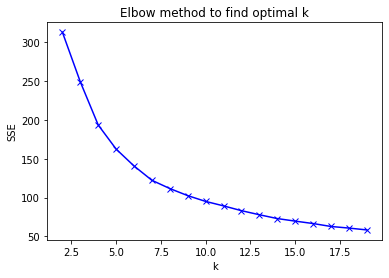

In [20]:
area_vars = ['bed_bath_ratio','structure_dollar_per_sqft','taxrate']
wrangle_zillow.elbow_plot(X_train_scaled, cluster_vars=area_vars)

In [21]:
k=6
#wrangle_zillow.run_kmeans(X_train_scaled,k,cluster_vars=area_vars,cluster_col_name='bedbathsqft')

In [22]:
def run_kmeans(X_train_scaled, X_train,k, cluster_vars, cluster_col_name):
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train.index)
    
    return train_clusters, kmeans

train_clusters, kmeans = run_kmeans(X_train_scaled, X_train,k, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [23]:
train_clusters.bedbathsqft.value_counts()

2    13844
4     8603
1     7699
0     2847
5     2594
3     2154
Name: bedbathsqft, dtype: int64

In [24]:
centroid_col_names = ['centroid_' + i for i in area_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'bedbathsqft'})

In [25]:
# concatenate cluster id
X_train = pd.concat([X_train, train_clusters], axis=1)

# join on clusterid to get centroids
X_train = X_train.merge(centroids, how='left', on=['bedbathsqft']).\
                set_index(X_train.index)

In [26]:
def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
    kmeans.transform(X_scaled[cluster_vars])
    trans_clusters = \
        pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_scaled.index)
    
    return trans_clusters

validate_clusters = kmeans_transform(X_validate_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [27]:
def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
    kmeans.transform(X_scaled[cluster_vars])
    trans_clusters = \
        pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_scaled.index)
    
    return trans_clusters

test_clusters = kmeans_transform(X_test_scaled, kmeans, cluster_vars=area_vars, cluster_col_name='bedbathsqft')

In [28]:
centroid_col_names = ['centroid_' + i for i in area_vars]
centroid_col_names

centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': 'bedbathsqft'})


In [29]:
centroids

,bedbathsqft,centroid_bed_bath_ratio,centroid_structure_dollar_per_sqft,centroid_taxrate
0,0,0.125967,0.205608,0.236112
1,1,0.262289,0.073509,0.251920
2,2,0.180603,0.080928,0.247108
3,3,0.206399,0.046870,0.423550
4,4,0.108083,0.095701,0.244152
5,5,0.414773,0.067699,0.272152


In [30]:
#CC'ing clusters and centroids to DF with this function

X_train, X_train_scaled = wrangle_zillow.add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name = 'bedbathsqft')

X_validate, X_validate_scaled = wrangle_zillow.add_to_train(validate_clusters, centroids, X_validate, X_validate_scaled, cluster_col_name = 'bedbathsqft')

X_test, X_test_scaled = wrangle_zillow.add_to_train(test_clusters, centroids, X_test, X_test_scaled, cluster_col_name = 'bedbathsqft')

ValueError: The column label 'bedbathsqft' is not unique.

In [31]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((37741, 21), (16175, 21), (13479, 21))

In [ ]:
def add_to_train(cluster_col_name):
    # concatenate cluster id
    X_train2 = pd.concat([X_train, train_clusters], axis=1)

    # join on clusterid to get centroids
    X_train2 = X_train2.merge(centroids, how='left', 
                            on=cluster_col_name).\
                        set_index(X_train.index)
    
    # concatenate cluster id
    X_train_scaled2 = pd.concat([X_train_scaled, train_clusters], 
                               axis=1)

    # join on clusterid to get centroids
    X_train_scaled2 = X_train_scaled2.merge(centroids, how='left', 
                                          on=cluster_col_name).\
                            set_index(X_train.index)
    
    return X_train2, X_train_scaled2

In [ ]:
#X_train, X_train_scaled = add_to_train(cluster_col_name='bedbathsqft')

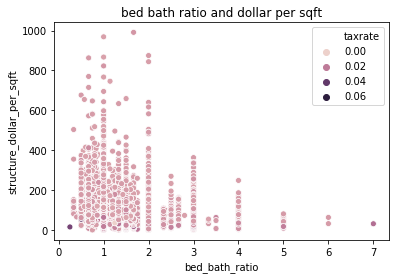

In [33]:
sns.scatterplot(x='bed_bath_ratio', y='structure_dollar_per_sqft', hue='taxrate', data=X_train)
plt.title("bed bath ratio and dollar per sqft")
plt.show()

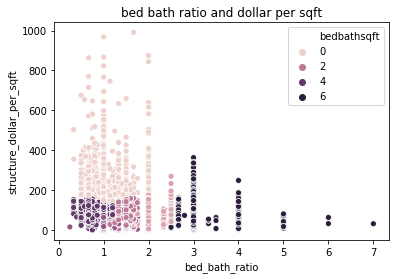

In [34]:
sns.scatterplot(x='bed_bath_ratio', y='structure_dollar_per_sqft', hue='bedbathsqft', data=X_train)
plt.title("bed bath ratio and dollar per sqft")
plt.show()

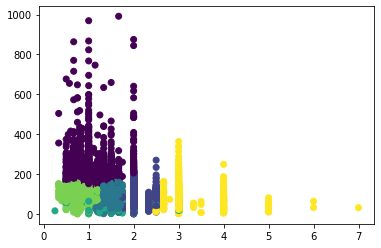

In [35]:
plt.scatter(X_train.bed_bath_ratio, X_train.structure_dollar_per_sqft, c=X_train.bedbathsqft)
plt.show()

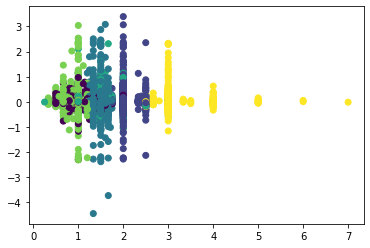

In [37]:
plt.scatter(X_train.bed_bath_ratio, y_train.logerror, c=X_train.bedbathsqft)
plt.show()

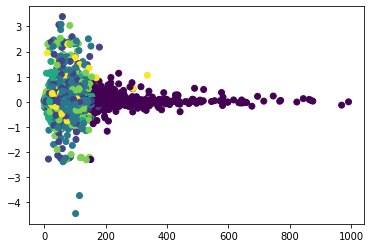

In [38]:
plt.scatter(X_train.structure_dollar_per_sqft, y_train.logerror, c=X_train.bedbathsqft)
plt.show()